In [1]:
import cv2 # To do image processing 
import numpy as np
import glob # To manipulate files
from PIL import Image # To display images
import os # To access files
import random # To create random numbers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # To display confusion matrix
import matplotlib.pyplot as plt # To make plots

In [2]:
# Importing drive for running in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Function to detect eyes:
def detect_open_eye(image, lower_white, upper_white, threshold):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the color range for the white of the eye. Transforms the tuples to np.arrays, which is needed.
    lower_white = np.array(lower_white)
    upper_white = np.array(upper_white)

    # Create a mask based on the color range
    mask = cv2.inRange(hsv_image, lower_white, upper_white)

    # Apply the mask to the image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Convert the masked image to grayscale
    gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

    # Calculate the proportion of white pixels in the grayscaled image:
    white_pixel_count = np.count_nonzero(gray_image) # Find the pixels that are white.
    total_pixel_count = gray_image.size # Find the total pixels in the image.
    white_pixel_ratio = white_pixel_count / total_pixel_count

    # Below is commented out to avoid spamming the terminal.
    ##. commented out: print("white_pixel_ratio: " + str(white_pixel_ratio))
    return white_pixel_ratio > threshold # Returns TRUE if the white_pixel_ratio is more than the threshold we set.

Original Image: _169.jpg


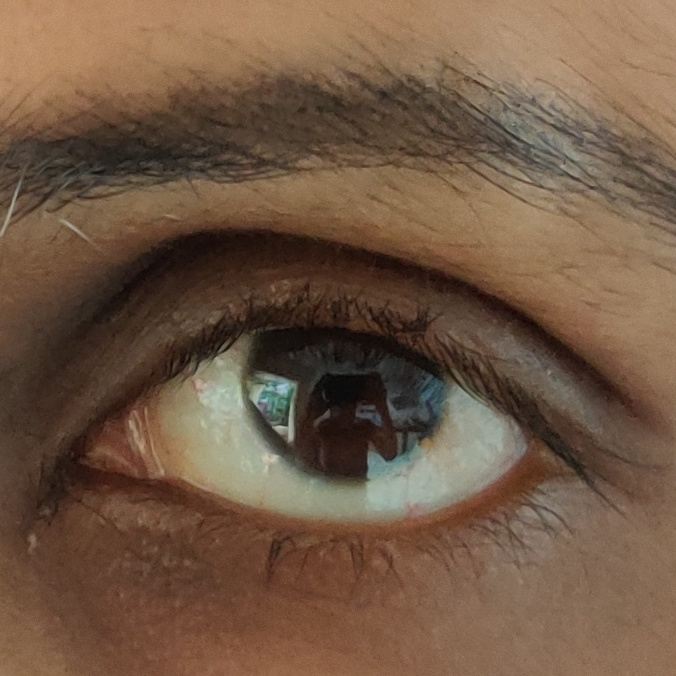

HSV Image:


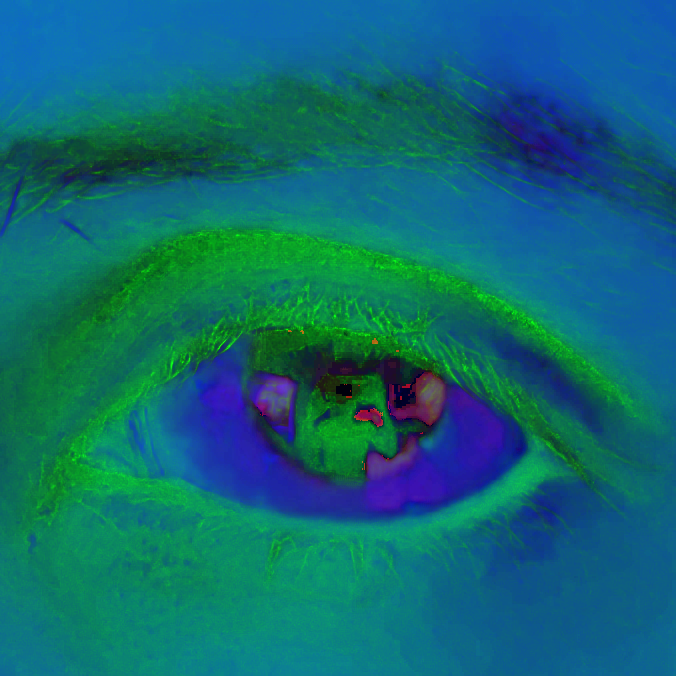

Masked image:


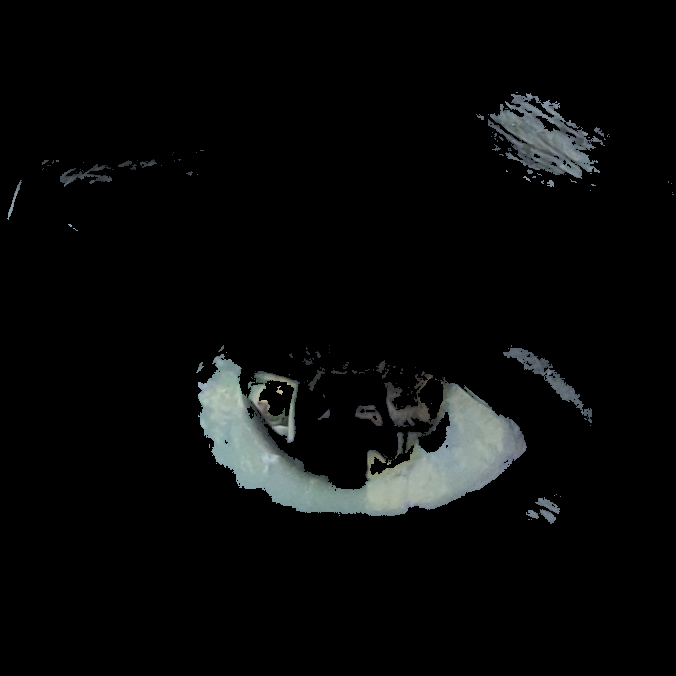

Grey-scaled image:


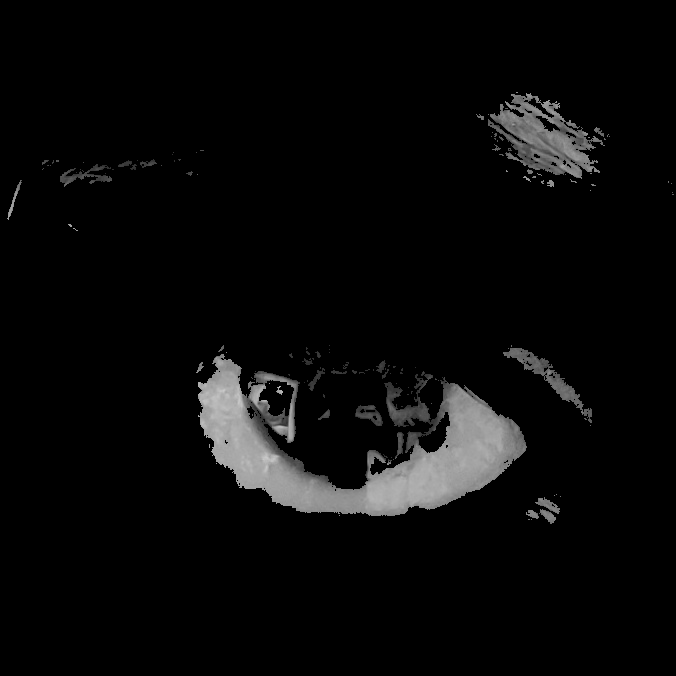

In [23]:
# This part of the code was made for exploring the different steps of the image processing:

# Please update the folder_path to fit your directory:
folder_path = "/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/test/Open/"

# Saving the file names for all images in the folder and shuffle the list.
image_list = os.listdir(folder_path) 
random.shuffle(image_list) 

# Join first image name in list and path to get full file path:
image_path = os.path.join(folder_path, image_list[0])
test_Img = cv2.imread(image_path) # Reads the image to be displayed.
print("Original Image:", image_list[i]) 
# Change color to correct RGB and display it:
imageRGB = cv2.cvtColor(test_Img, cv2.COLOR_BGR2RGB) 
print_original_image = Image.fromarray(imageRGB) 
print_original_image.show()

# Convert the image to HSV color space and display it:
hsv_Img = cv2.cvtColor(test_Img, cv2.COLOR_BGR2HSV)
print("HSV Image:")
print_HSV_image = Image.fromarray(hsv_Img) 
print_HSV_image.show()

# Define the color range for the white of the eye:
lower_white = np.array([0, 0, 50])
upper_white = np.array([180, 50, 255])

# Create a mask based on the color range and apply it to the image:
mask = cv2.inRange(hsv_Img, lower_white, upper_white)
masked_image = cv2.bitwise_and(test_Img, test_Img, mask=mask)

# Display the image:
print("Masked image:")
print_masked_image = Image.fromarray(masked_image) #Using the Image package to assign a viewable image to a new variable.
print_masked_image.show()

# Convert the image to greyscale and display it:
gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
print("Grey-scaled image:")
print_grey_image = Image.fromarray(gray_image)
print_grey_image.show() 

Now testing arrays: [0, 0, 20] [120, 30, 255] and threshold: 0.01
Total files in folder: 1234
Total correct predictions: 779 (63.13% accuracy)
Now testing arrays: [0, 0, 20] [120, 30, 255] and threshold: 0.03
Total files in folder: 1234
Total correct predictions: 708 (57.37% accuracy)
Now testing arrays: [0, 0, 20] [120, 30, 255] and threshold: 0.05
Total files in folder: 1234
Total correct predictions: 689 (55.83% accuracy)
Now testing arrays: [0, 0, 45] [130, 30, 255] and threshold: 0.01
Total files in folder: 1234
Total correct predictions: 785 (63.61% accuracy)
Now testing arrays: [0, 0, 45] [130, 30, 255] and threshold: 0.03
Total files in folder: 1234
Total correct predictions: 714 (57.86% accuracy)
Now testing arrays: [0, 0, 45] [130, 30, 255] and threshold: 0.05
Total files in folder: 1234
Total correct predictions: 692 (56.08% accuracy)
Now testing arrays: [0, 0, 70] [180, 50, 255] and threshold: 0.01
Total files in folder: 1234
Total correct predictions: 775 (62.80% accuracy)

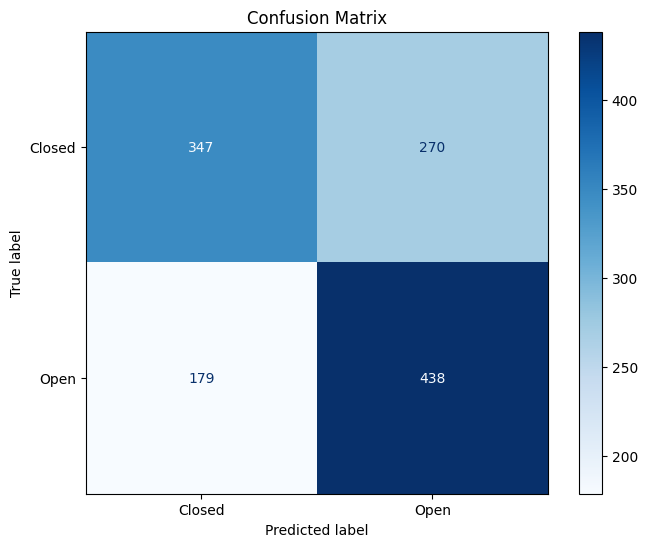

Precision: 0.619% accuracy)
Recall: 0.710% accuracy)
F1 Score: 0.661% accuracy)


In [46]:
# Holds paths in Google Drive - one for open and one for closed eyes. OBS! Will have to be different in VStudio environment!
paths = ["/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/train/Closed/*.*", 
         "/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/train/Open/*.*"]

# Define tuples for three types of lower_ & upper_white values (color ranges). This is needed for the manual "gridsearch":
values_sets = [
    ([0, 0, 20], [120, 30, 255]),
    ([0, 0, 45], [130, 30, 255]),
    ([0, 0, 70], [180, 50, 255]),
    ([20, 20, 210], [200, 60, 255]),
]

# Define array for different threshold values. This is needed for the manual "gridsearch":
# The threshold 
threshold_values = [0.01, 0.03, 0.05]

# To save best scores and parameters:
best_score = float('-inf')  # Initialize the best score as negative infinity
best_parameters = None  # Initialize the best parameters as None

# For confusion matrix
FP = 0
TP = 0
TN = 0
FN = 0

# Loop through the different color ranges:
for lower_white, upper_white in values_sets:
  # Loop through the different threshold values: 
    for threshold in threshold_values:
        print("Now testing arrays: " + str(lower_white) + " " + str(upper_white) + " and threshold: " + str(threshold))
        
        #Variable to track correct predictions and total images:
        matches = 0
        total_images = 0
        temp_TP = 0
        temp_FP = 0
        temp_TN = 0
        temp_FN = 0

      #Loops through both paths. Kind of a weird for loop, which allows us to access each index starting at 1 (will be used when counting matches!):
        for i, path in enumerate(paths, start=1):
          
          # Add and assign the number of all images found in the currect path:
          total_images += len(glob.glob(path))

          # Loops each file found in the folder found in the path:
          for file in glob.glob(path):
            #Use cv2 to read the file:
            eye_image = cv2.imread(file)

            #Calls function to detect open eyes:
            is_open = detect_open_eye(eye_image, lower_white, upper_white, threshold)

          #Displays prediction and logs correct matches:
          #OBS! I commented out the print statements, to not spam the terminal. In smaller tests, it can be nice to see predictions for each image!
            if is_open and i == 1: ## i == 1 means it's looping through closed eye images (first path in paths array.
              #print("Prediction: Eye is open")  
              matches = matches # The match is not correct, so the matches value stays unchanged :-)
              temp_FP += 1
            elif is_open and i == 2: ## i == 2 means it's looping through open eye images (second path in paths array).
              #print("Prediction: Eye is open")
              matches += 1 # The match is correct, so the matches value increases with 1! :-)
              temp_TP += 1
            elif not is_open and i == 1:
              #print("Prediction: Eye is closed")
              matches += 1
              temp_TN += 1
            else:
              #print("Prediction: Eye is closed")
              matches = matches
              temp_FN += 1


# NOTE TO SELF: Open = 1 (Positive) //// Closed = 0 (Negative)

        # For each round of testing in both closed/open eye folders, the accuracy is calculated and displayed:
        print("Total files in folder: " + str(total_images))
        accuracy_percent = matches / total_images * 100
        print("Total correct predictions: " + str(matches) + " ({:.2f}% accuracy)".format(accuracy_percent))

        # The best score and parameters are saved:
        if accuracy_percent > best_score:
          best_score = accuracy_percent
          best_parameters = (threshold, lower_white, upper_white)
          FP = temp_FP
          TP = temp_TP
          TN = temp_TN
          FN = temp_FN

# Finally print the best accuracy and parameters:
print("----------")
print("Best Accuracy:", best_score)
print("----------")
print("With Parameters:", best_parameters)
print("Threshold: ", best_parameters[0])
print("Lower_white: ", best_parameters[1])
print("Upper_white: ", best_parameters[2])


# Define the confusion matrix data
confusion_matrix = np.array([[TN, FP], [FN, TP]])
# Define the labels for different classes or categories
class_labels = ['Closed', 'Open']
# Create the confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(8, 6)) # Create a figure and axes

# Plot the confusion matrix
cm_display.plot(ax=ax, cmap='Blues')
ax.set_title("Confusion Matrix")
plt.show()


# Calculate precision, recall, f1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision: {:.3f}% accuracy)".format(precision))
print("Recall: {:.3f}% accuracy)".format(recall))
print("F1 Score: {:.3f}% accuracy)".format(f1_score))

Total files in folder: 6
Total correct predictions: 4 (66.67% accuracy)


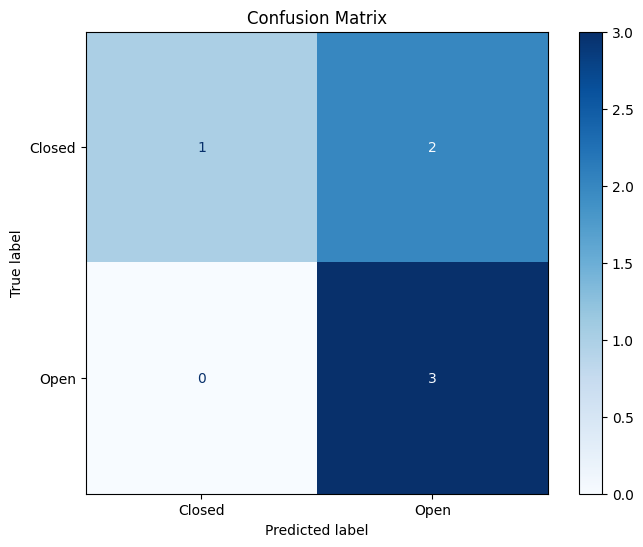

In [54]:
# Making predictions with the best parameter model:

paths = ["/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/predictions/Closed/*.*", 
         "/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/predictions/Open/*.*"]

# Define color range and threshold: 
values_set = ([0, 0, 20], [120, 30, 255])
threshold = 0.01

#Variable to track correct predictions and total images:
matches = 0
total_images = 0
temp_TP = 0
temp_FP = 0
temp_TN = 0
temp_FN = 0

      #Loops through both paths. Kind of a weird for loop, which allows us to access each index starting at 1 (will be used when counting matches!):
for i, path in enumerate(paths, start=1):

  # Add and assign the number of all images found in the currect path:
  total_images += len(glob.glob(path))

  # Loops each file found in the folder found in the path:
  for file in glob.glob(path):
    #Use cv2 to read the file:
    eye_image = cv2.imread(file)

    #Calls function to detect open eyes:
    is_open = detect_open_eye(eye_image, lower_white, upper_white, threshold)

  #Displays prediction and logs correct matches:
  #OBS! I commented out the print statements, to not spam the terminal. In smaller tests, it can be nice to see predictions for each image!
    if is_open and i == 1: ## i == 1 means it's looping through closed eye images (first path in paths array.
      #print("Prediction: Eye is open")  
      matches = matches # The match is not correct, so the matches value stays unchanged :-)
      temp_FP += 1
    elif is_open and i == 2: ## i == 2 means it's looping through open eye images (second path in paths array).
      #print("Prediction: Eye is open")
      matches += 1 # The match is correct, so the matches value increases with 1! :-)
      temp_TP += 1
    elif not is_open and i == 1:
      #print("Prediction: Eye is closed")
      matches += 1
      temp_TN += 1
    else:
      #print("Prediction: Eye is closed")
      matches = matches
      temp_FN += 1


# NOTE TO SELF: Open = 1 (Positive) //// Closed = 0 (Negative)

# For each round of testing in both closed/open eye folders, the accuracy is calculated and displayed:
print("Total files in folder: " + str(total_images))
accuracy_percent = matches / total_images * 100
print("Total correct predictions: " + str(matches) + " ({:.2f}% accuracy)".format(accuracy_percent))

# Define the confusion matrix data
confusion_matrix = np.array([[temp_TN, temp_FP], [temp_FN, temp_TP]])
# Define the labels for different classes or categories
class_labels = ['Closed', 'Open']
# Create the confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(8, 6)) # Create a figure and axes

# Plot the confusion matrix
cm_display.plot(ax=ax, cmap='Blues')
ax.set_title("Confusion Matrix")
plt.show()


Original Image: IMG_1264.jpg


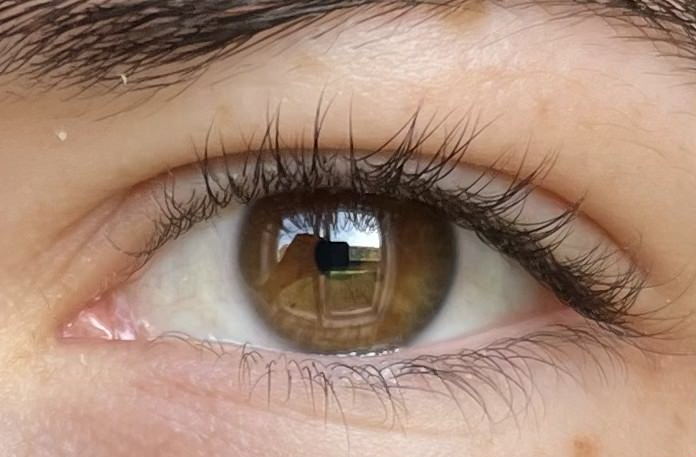

HSV Image:


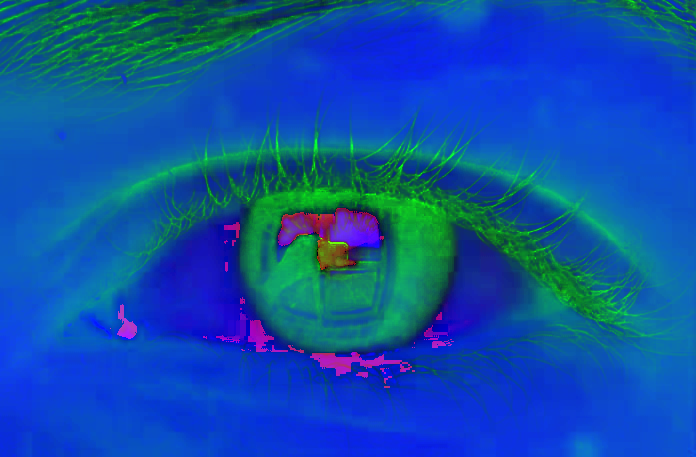

Masked image:


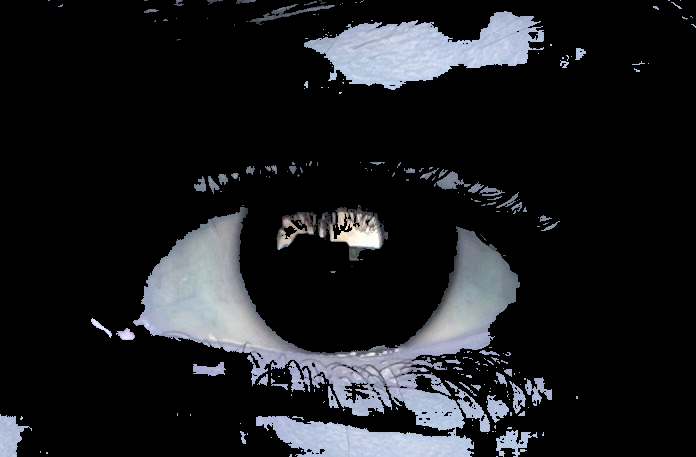

Grey-scaled image:


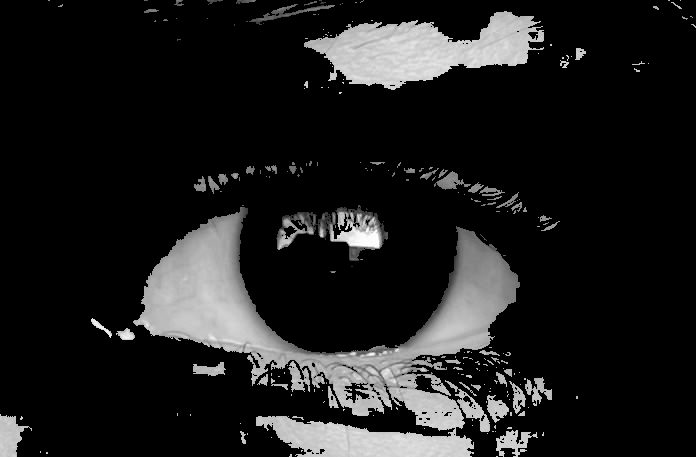

In [65]:
# This part of the code was made for exploring the different steps of the image processing:
folder_path = "/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/predictions/Open/"

image_list = os.listdir(folder_path)
random.shuffle(image_list)

image_path = os.path.join(folder_path, image_list[0])
test_Img = cv2.imread(image_path)
print("Original Image:", image_list[i])
imageRGB = cv2.cvtColor(test_Img, cv2.COLOR_BGR2RGB)
print_original_image = Image.fromarray(imageRGB)
print_original_image.show()

hsv_Img = cv2.cvtColor(test_Img, cv2.COLOR_BGR2HSV)

print("HSV Image:")
print_HSV_image = Image.fromarray(hsv_Img) #Using the Image package to assign a viewable image to a new variable.
print_HSV_image.show()

# Define the color range for the white of the eye
lower_white = np.array([0, 0, 50])
upper_white = np.array([180, 50, 255])

# Create a mask based on the color range
mask = cv2.inRange(hsv_Img, lower_white, upper_white)

# Apply the mask to the image
masked_image = cv2.bitwise_and(test_Img, test_Img, mask=mask)

print("Masked image:")
print_masked_image = Image.fromarray(masked_image) #Using the Image package to assign a viewable image to a new variable.
print_masked_image.show()

gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

print("Grey-scaled image:")
print_grey_image = Image.fromarray(gray_image)
print_grey_image.show() #Using the Image package to assign a viewable image to a new variable.
